<a href="https://colab.research.google.com/github/comparativechrono/PyCulture/blob/main/timecourse/plot_cells.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

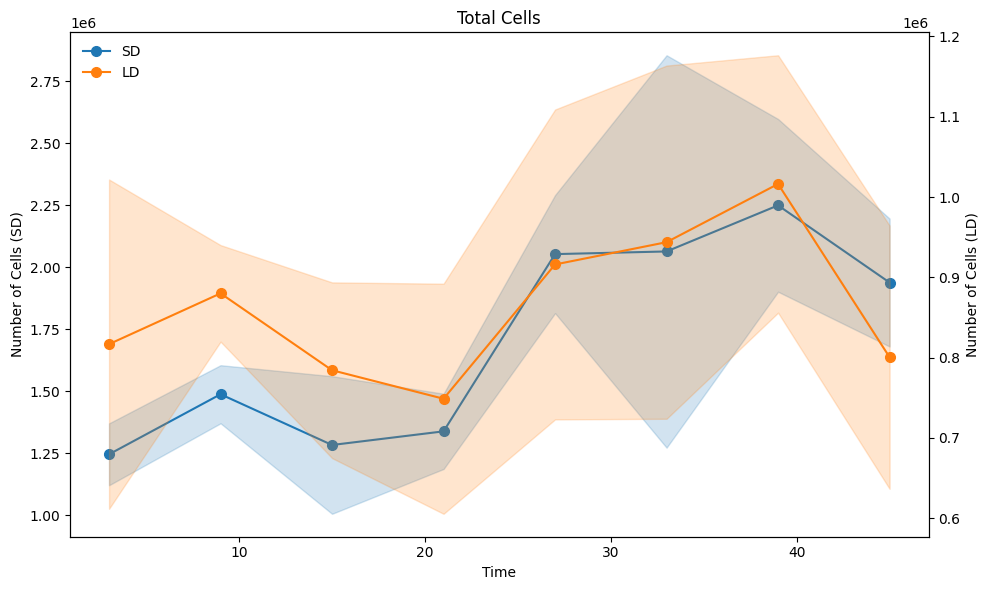

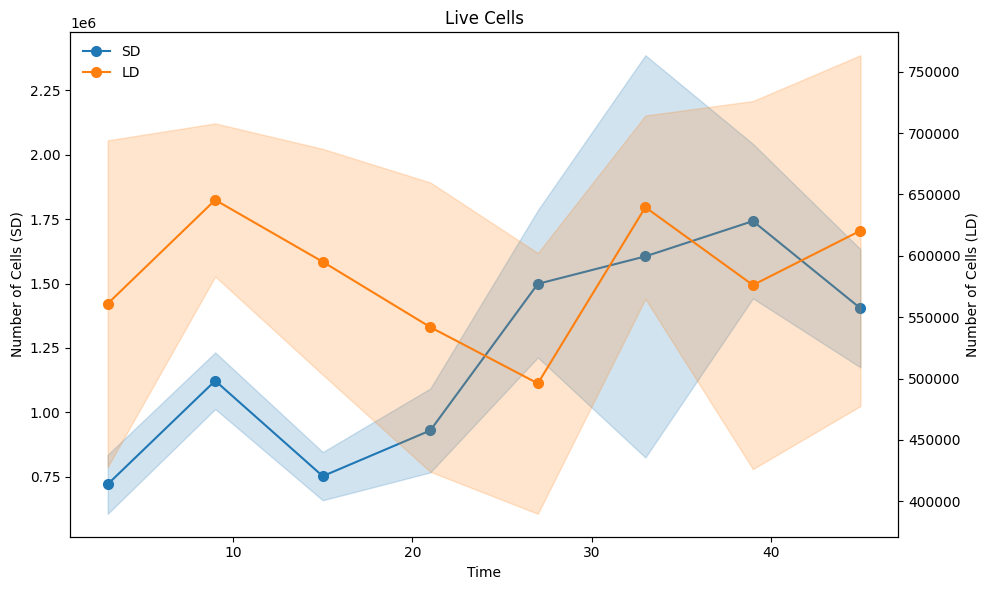

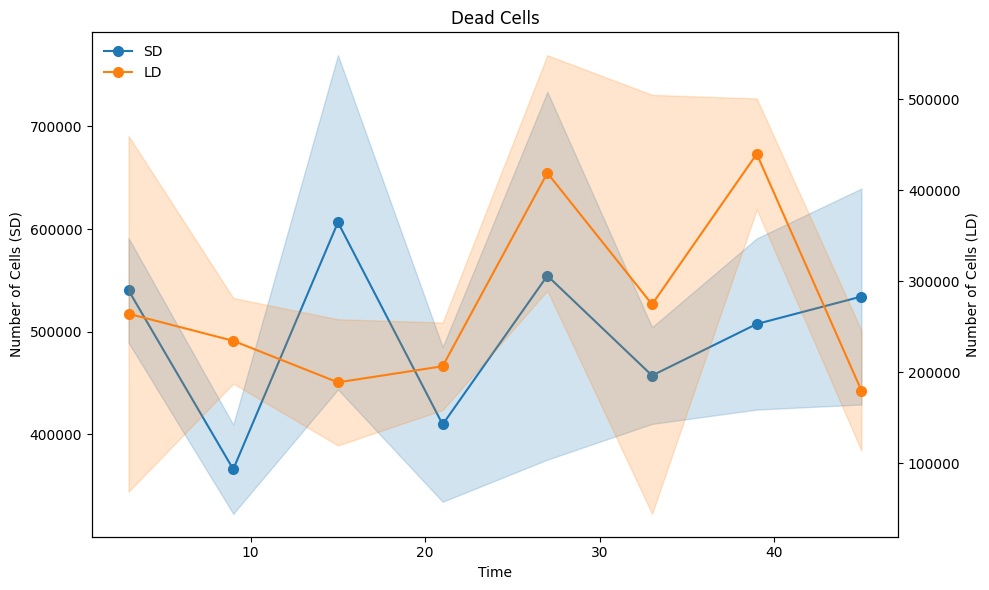

In [19]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load the Data
file_path = '/content/cells.txt'  # Update the file path if necessary
df = pd.read_csv(file_path, sep='\t')

# Step 2: Calculate Mean and Standard Deviation
grouped_df = df.groupby(['Photoperiod', 'Time', 'Status'])['Number of cells (per 3 ml)']
summary_df = grouped_df.agg(['mean', 'std']).reset_index()

# Step 3: Plotting with Combined Legend, Secondary Y-Axis, and Markers
cell_statuses = ['Total', 'Live', 'Dead']  # Define the different statuses

for status in cell_statuses:
    # Set up the figure for each status
    fig, ax1 = plt.subplots(figsize=(10, 6))

    # Filter for the current status
    status_df = summary_df[summary_df['Status'] == status]

    # Separate data by photoperiod
    sd_df = status_df[status_df['Photoperiod'] == 'SD']
    ld_df = status_df[status_df['Photoperiod'] == 'LD']

    # Use default color cycle
    colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

    # Plot SD data on the primary y-axis with markers
    line1, = ax1.plot(sd_df['Time'], sd_df['mean'], label='SD', marker='o', markersize=7, color=colors[0])
    ax1.fill_between(
        sd_df['Time'],
        sd_df['mean'] - sd_df['std'],
        sd_df['mean'] + sd_df['std'],
        color=colors[0], alpha=0.2
    )
    ax1.set_xlabel('Time')
    ax1.set_ylabel('Number of Cells (SD)')
    ax1.tick_params(axis='y')

    # Create secondary y-axis for LD data
    ax2 = ax1.twinx()
    line2, = ax2.plot(ld_df['Time'], ld_df['mean'], label='LD', marker='o', markersize=7, color=colors[1])
    ax2.fill_between(
        ld_df['Time'],
        ld_df['mean'] - ld_df['std'],
        ld_df['mean'] + ld_df['std'],
        color=colors[1], alpha=0.2
    )
    ax2.set_ylabel('Number of Cells (LD)')
    ax2.tick_params(axis='y')

    # Combine legends
    plt.legend([line1, line2], ['SD', 'LD'], loc="upper left", frameon=False)

    # Add title and adjust layout
    plt.title(f'{status} Cells')
    fig.tight_layout()  # Adjust layout to prevent overlap
    plt.show()
